# Histograms, Binnings, and Density

A Simple histogram can be a great first step in understainding a dataset. Earlier, we saw a preview of matplotlib's histogram functions, which  creates a asic hisogram in one line, once the normal bolerplate imports are done:

In [17]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('seaborn-white')

data = np.random.randn(1000)

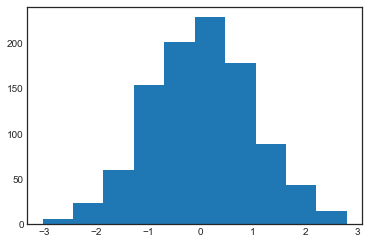

In [3]:
plt.hist(data);

The `hist()` function has many options to tune both the calculation and the display; here's an example of a more customized histogram:

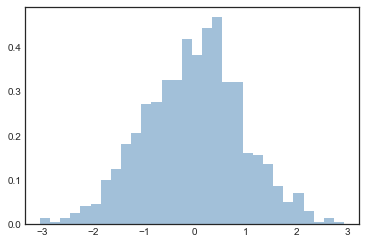

In [29]:
plt.hist(data, density=True, bins=30, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none');

I find this combination of `histtype='stepfilled` along with some transparency `alpha` to be very useful when comparing histograms of serveral distributions

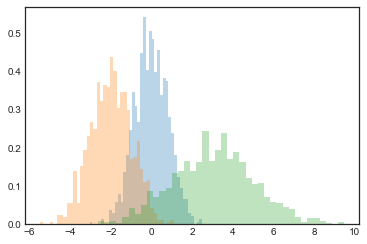

In [32]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

If you would like to simply compute the histogram (that is, count the number of points in a given bin) and not display it, the `np.histogram()` function is available:

In [35]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 29 231 470 235  35]


In [36]:
bin_edges

array([-3.03926981, -1.84531921, -0.65136861,  0.54258198,  1.73653258,
        2.93048318])

## Two-Dimensional Histograms and Binnigns

Just as we create histograms in one dimension by dividng the number-line into bins, we can also create histograms in two-dimensions by dividing points among two-dimensional bins. We'll take a brief look at several ways to do this here. We'll start by defining some data - an `x` and `y` array drawn from a multivariate Gaussian distribution:

In [37]:
mean = [0, 0]
cov =[[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 100_000).T

### `plt.hist2d`: Two-Dimensional histogram

One straightforward way to plot a two-dimensional histogram is to sue Matplotlib's `plt.hist2d` function:

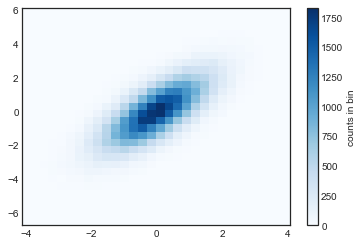

In [38]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

Just as with `plt.hist`, `plt.hist2d` has a number of extra options to fine-tune the plot and the binning, which are nicely outline in the funciton dosctring. Further, just as `plt.hist` has counterpart in `np.histogram`, `plt.hist2d` has a conterpart in `np.histogram2d`, which can be used as follows:

In [39]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

For the generalization of this histogram binning in dimensions higher than two, see the `np.histogramdd` function.

### `plt.hexbin`: Hexagonal binnings

The two-dimensional histogram creates a tesselation of squares across the axes. Another natural shape for such a tesselation is the regular hexagon. For this purpose, Matplotlib provides the `plt.hexbin` routine, which will represents a two-dimensional dataset bined within a grid of hexagons:

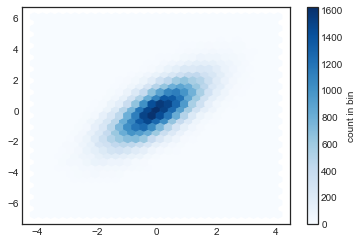

In [40]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

`plt.hexbin` has a number of interesting options, including the ability to specify weights for each point, and to change the output in each bin to any NumPy aggregate (mean of weights, standard deviation of weights, etc.)

### Kernel density estimation

Another common method of evaluating densities in multiple dimensions ins *kernel density estimation*(KDE). This will be discussed more fully, but for now we'll simply mention that KDE can be through of as a way to "smear out" the points in space and add up the result to obtain a smooth function. One extremely quick and simple KDE implementation exist in the `scipy.stats` package. Here is a quick example of using the KDE on this data:

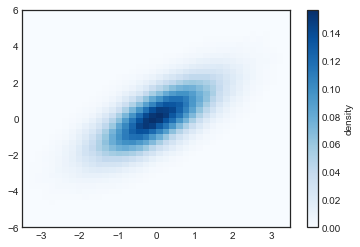

In [47]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")


KDE has a smoothing length that effectively slides the knon between detail and smoothness(one example of the ubiquitous bias-variance trade-off). The literature on choosing an appropriate smoothing length isa vas: `gaussian_kde` uses a rule-of-thumb to attempt to a find a nearly optimal smoothing length for the input data.

Other KDE implementations are available within the SciPy ecosystem, each with its own strnghts and weaknesses; see, for example, `sklearn.neighbors.KernelDensity` and `statsmodels.nonparametric.kernel_density.KDEMultivariate`. For visualizations based on KDE, using Matplotlib tends to be overly verbose. The seaborn library provides a much more terse API for creating KDE-based visualizations.